In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df=pd.read_csv('C:/Users/Kaiyu/Downloads/epf2.csv',parse_dates=True)
df = pd.DataFrame(df)

df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])


In [3]:
df

Date  High
0  1952-01-01  3.00
1  1953-01-01  3.00
2  1954-01-01  3.00
3  1955-01-01  3.50
4  1956-01-01  3.50
..        ...   ...
68 2019-01-01  8.50
69 2020-01-01  8.50
70 2021-01-01  8.10
71 2022-01-01  8.15
72 2023-01-01  8.25

[73 rows x 2 columns]

In [4]:
df = df[(df['Date'] <= '2020-01-01')]

In [5]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

adf_test(df['High'])

1. ADF :  -1.8273481464173498
2. P-Value :  0.36697109361662894
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 69
5. Critical Values :
	 1% :  -3.528889992207215
	 5% :  -2.9044395987933362
	 10% :  -2.589655654274312


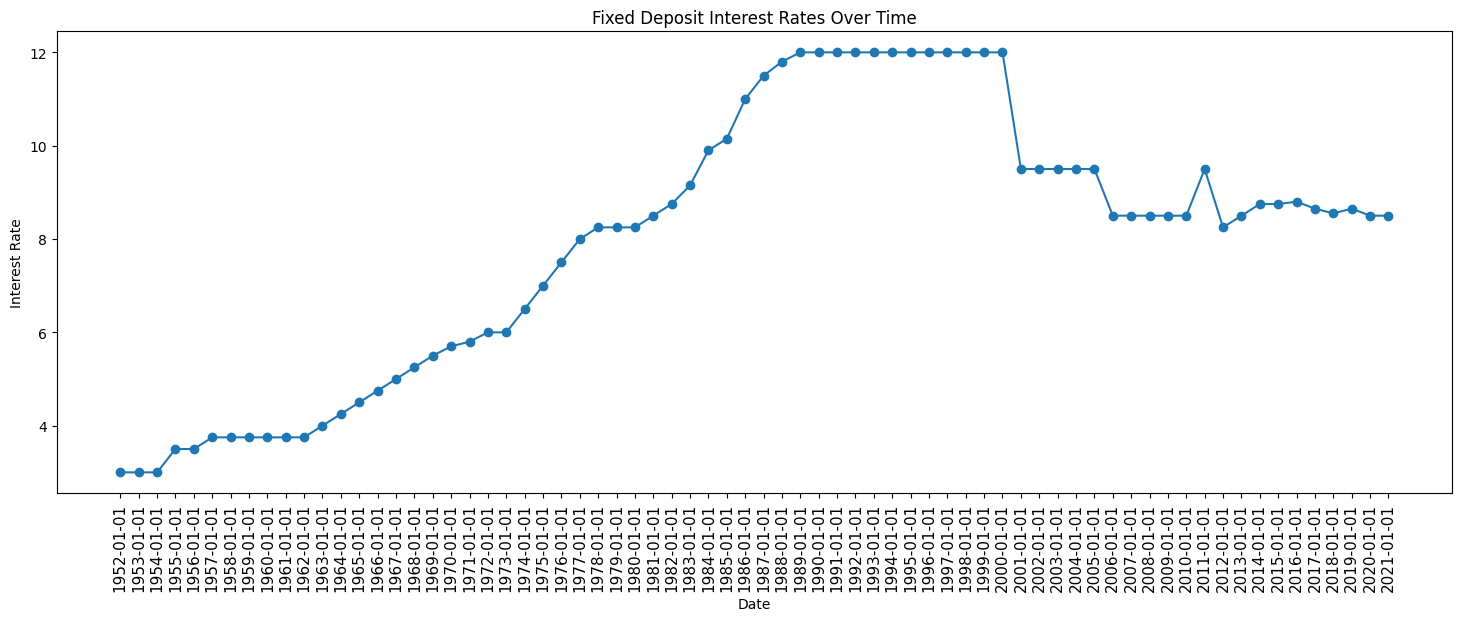

c:\Users\Kaiyu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


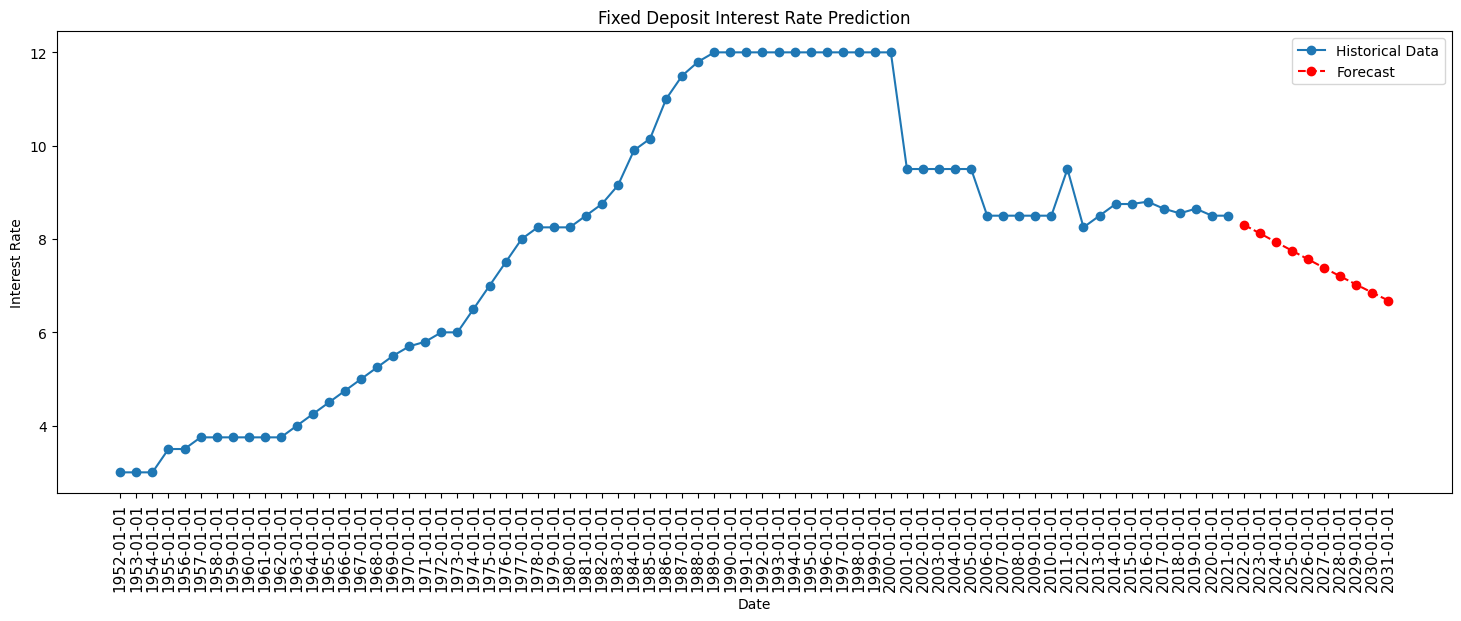

In [6]:
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)
# df.index = pd.date_range(start='1953-1-1', periods=len(df), freq='A')
df.index = pd.date_range(start='1952-01-01', periods=len(df), freq='YS', normalize=True)

plt.figure(figsize=(18, 6))

plt.plot(df.index, df['High'], marker='o')
plt.title('Fixed Deposit Interest Rates Over Time')
plt.xticks(df.index,rotation=90,fontsize=11)

plt.xlabel('Date')
plt.ylabel('Interest Rate')
plt.show()

model = ARIMA(df['High'], order=(2, 0, 2))
result = model.fit()

future_steps = 10
forecast = result.get_forecast(steps=future_steps)
forecast_index = pd.date_range(start=df.index[-1], periods=future_steps + 1, freq='YS')[1:]

plt.figure(figsize=(18, 6))

plt.plot(df.index, df['High'], label='Historical Data', marker='o')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', marker='o', linestyle='dashed', color='red')
plt.title('Fixed Deposit Interest Rate Prediction')
plt.xticks(df.index.union(forecast_index),rotation=90,fontsize=11)
plt.xlabel('Date')
plt.ylabel('Interest Rate')
plt.legend()
plt.show()


In [7]:
forecast.predicted_mean

2022-01-01    8.303496
2023-01-01    8.118893
2024-01-01    7.933420
2025-01-01    7.747929
2026-01-01    7.563259
2027-01-01    7.380241
2028-01-01    7.199688
2029-01-01    7.022395
2030-01-01    6.849136
2031-01-01    6.680659
Freq: YS-JAN, Name: predicted_mean, dtype: float64

In [8]:
# 2024-12-31    6.976358
# 2025-12-31    7.065852
# 2026-12-31    7.023395
# 2027-12-31    6.920244
# 2028-12-31    6.789174
# 2029-12-31    6.645262
# 2030-12-31    6.495442
# 2031-12-31    6.342906
# 2032-12-31    6.189120
# 2033-12-31    6.034759

In [9]:
forecast1=pd.DataFrame(forecast.predicted_mean)
forecast1.reset_index(inplace=True)

In [10]:
forecast1

index  predicted_mean
0 2022-01-01        8.303496
1 2023-01-01        8.118893
2 2024-01-01        7.933420
3 2025-01-01        7.747929
4 2026-01-01        7.563259
5 2027-01-01        7.380241
6 2028-01-01        7.199688
7 2029-01-01        7.022395
8 2030-01-01        6.849136
9 2031-01-01        6.680659

In [11]:
result_df=pd.read_csv('E:/forecast2.csv')
result_df = pd.DataFrame(result_df)

In [12]:
result_df

0         1           2         3
0  2024-01-01  6.976358  2021-01-01  6.909262
1  2025-01-01  7.065852  2022-01-01  6.907452
2  2026-01-01  7.023395  2023-01-01  6.931839
3  2027-01-01  6.920244  2024-01-01  6.981409
4  2028-01-01  6.789174  2025-01-01  7.054817
5  2029-01-01  6.645262  2026-01-01  7.150421
6  2030-01-01  6.495442  2027-01-01  7.266313
7  2031-01-01  6.342906  2028-01-01  7.400345
8  2032-01-01  6.189120  2029-01-01  7.550175
9  2033-01-01  6.034759  2030-01-01  7.713297

In [13]:
result_df = pd.concat([result_df,forecast1],axis=1,ignore_index=True)

In [14]:
result_df

0         1           2         3          4         5
0  2024-01-01  6.976358  2021-01-01  6.909262 2022-01-01  8.303496
1  2025-01-01  7.065852  2022-01-01  6.907452 2023-01-01  8.118893
2  2026-01-01  7.023395  2023-01-01  6.931839 2024-01-01  7.933420
3  2027-01-01  6.920244  2024-01-01  6.981409 2025-01-01  7.747929
4  2028-01-01  6.789174  2025-01-01  7.054817 2026-01-01  7.563259
5  2029-01-01  6.645262  2026-01-01  7.150421 2027-01-01  7.380241
6  2030-01-01  6.495442  2027-01-01  7.266313 2028-01-01  7.199688
7  2031-01-01  6.342906  2028-01-01  7.400345 2029-01-01  7.022395
8  2032-01-01  6.189120  2029-01-01  7.550175 2030-01-01  6.849136
9  2033-01-01  6.034759  2030-01-01  7.713297 2031-01-01  6.680659

In [15]:
result_df.to_csv('forecast2.csv', index=False)